In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
# Directory containing the PS Score CSV files
folder_path = '/gstore/project/crc_recursion_2/scMaGeck/sublib2_all'

In [6]:
# Initialize an empty list to store data from all CSV files
dataframes = []

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file and its name starts with "PS"
    if file_name.endswith('.csv') and file_name.startswith('PS'):
        #Extract the name of the file without the extension
        name_without_extension = os.path.splitext(file_name)[0]
        # Read the CSV file into a pandas DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, index_col=0)
        
        #Rename the column to the file name (without the extension"
        df.columns = [name_without_extension.split("_")[-1]]
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, axis=1)

# Write the combined data to a CSV file
output_file = '/gstore/project/crc_recursion_2/scMaGeck/sublib2_all/PS_all.csv'
combined_df.to_csv(output_file)

print("Combined data has been written to:", output_file)

Combined data has been written to: /gstore/project/crc_recursion_2/scMaGeck/sublib2_all/PS_all.csv


## Read the AnnData

In [8]:
combined_df["IQGAP2"].i

SAM24439046_rep1-AAACGAACACATAGCT            0.0
SAM24439046_rep1-AAAGAACCATTCCTCG            0.0
SAM24439046_rep1-AAAGAACTCGTGTGGC            0.0
SAM24439046_rep1-AAAGGTACACATAACC            0.0
SAM24439046_rep1-AAAGGTAGTCTCGGAC            0.0
                                            ... 
SAM24426527_Replicate1-TGTCCACTCTCATGCC-1    NaN
SAM24426528_Replicate1-ACTATCTGTCGTATTG-1    NaN
SAM24426528_Replicate1-CGGAACCGTATGGTTC-1    NaN
SAM24426528_Replicate1-TCGCACTGTTGGAGAC-1    NaN
SAM24426528_Replicate1-TTGTGTTCAGATCCTA-1    NaN
Name: IQGAP2, Length: 574589, dtype: float64

In [3]:
adata = sc.read("/gstore/scratch/u/ghaffars/Dataset/sublib2/raw_qc.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 574705 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    var: 'ID', 'Symbol', 'Type'
    layers: 'counts'

In [5]:
adata.obs['gene_symbol'] = adata.obs['gene_symbol'].apply(lambda x:x.split('_')[0])

In [6]:
adata.obs['gene_symbol'].value_counts().reset_index()[:10]

,index,gene_symbol
0,NTC,14877
1,CTNNB1,1564
2,TCF7L2,456
3,CD81,383
4,MYC,206
5,ST3GAL4,199
6,ADCYAP1,196
7,PADI4,191
8,CACNA2D3,190
9,GDPGP1,188


In [9]:
PS = pd.read_csv("/gstore/home/ghaffars/Projects/scMaGeck_Draft/PS_sublib2.csv",index_col=0)

In [10]:
PS

,CD81,CTNNB1,MYC,TCF7L2
SAM24439046_rep1-AAACGAACACATAGCT,0.00000,0.000000,0.0,0.0
SAM24439046_rep1-AAACGCTAGACGCCCT,0.00000,0.000000,0.0,0.0
SAM24439046_rep1-AAAGAACCATTCCTCG,0.00000,0.000000,0.0,0.0
SAM24439046_rep1-AAAGAACTCGTGTGGC,0.00000,0.000000,0.0,0.0
SAM24439046_rep1-AAAGGATAGAAGCGAA,0.82197,0.000000,0.0,0.0
...,...,...,...,...
SAM24426528_Replicate1-TTTGGAGTCGATACGT-1,0.00000,0.000000,0.0,0.0
SAM24426528_Replicate1-TTTGGTTAGCATGAAT-1,0.00000,0.679901,0.0,0.0
SAM24426528_Replicate1-TTTGGTTTCAGGAGAC-1,0.00000,0.000000,0.0,0.0
SAM24426528_Replicate1-TTTGTTGCATTCACCC-1,0.00000,0.000000,0.0,0.0


In [ ]:
df = adata.obs.join(PS).copy()

In [ ]:
df[['CD81','CTNNB1', 'MYC', 'TCF7L2']]= df[['CD81','CTNNB1', 'MYC', 'TCF7L2']].fillna(0)

In [ ]:
adata.obs = df.copy()

In [ ]:
RP = rp.RapidsSingleCellPipeline(adata)

## Run Normalize -> HGV -> PCA -> kNN -> Leiden -> UMAP 

In [ ]:
RP.proc(2000, norm=True, scale=True, regress=False, embedding=True,
                 n_components=50, n_neighbors=10, knn_n_pcs=30, batch_key=None, filtered= False)

In [ ]:
RP.adata

In [55]:
bdata = RP.adata[RP.adata.obs["gene_symbol"].isin(['CTNNB1','NTC'])].copy()

In [56]:
bdata

AnnData object with n_obs × n_vars = 1564 × 2000
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class', 'CD81', 'CTNNB1', 'MYC', 'TCF7L2', 'leiden'
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [59]:
cdata = RP.adata[RP.adata.obs["gene_symbol"]=='TCF7L2'].copy()

In [60]:
ddata = RP.adata[RP.adata.obs["gene_symbol"]=='MYC'].copy()

In [68]:
ddata.obs = ddata.obs .rename(columns={'MYC': 'MYC_1'})

In [69]:
ddata

AnnData object with n_obs × n_vars = 206 × 2000
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class', 'CD81', 'CTNNB1', 'MYC_1', 'TCF7L2', 'leiden'
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [62]:
edata = RP.adata[RP.adata.obs["gene_symbol"]=='CD81'].copy()

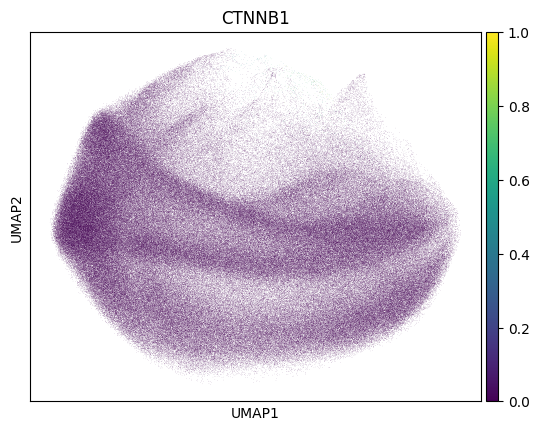

In [57]:
sc.pl.umap(RP.adata, color='CTNNB1', cmap=plt.get_cmap('viridis'))

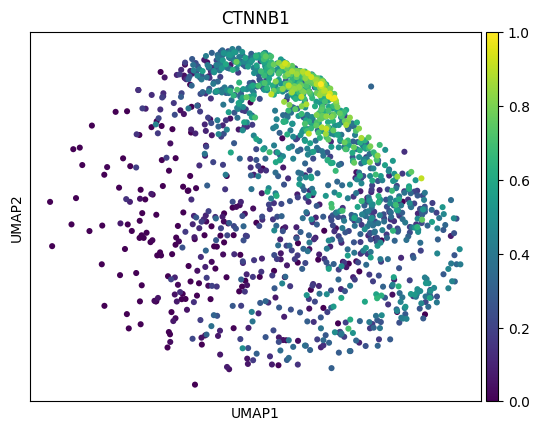

In [58]:
sc.pl.umap(bdata, color='CTNNB1', cmap=plt.get_cmap('viridis'))

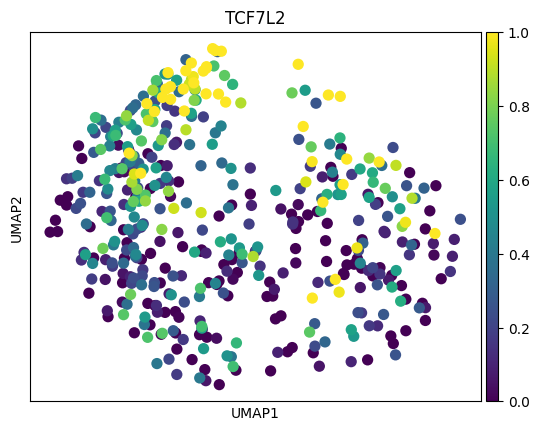

In [63]:
sc.pl.umap(cdata, color='TCF7L2', cmap=plt.get_cmap('viridis'))

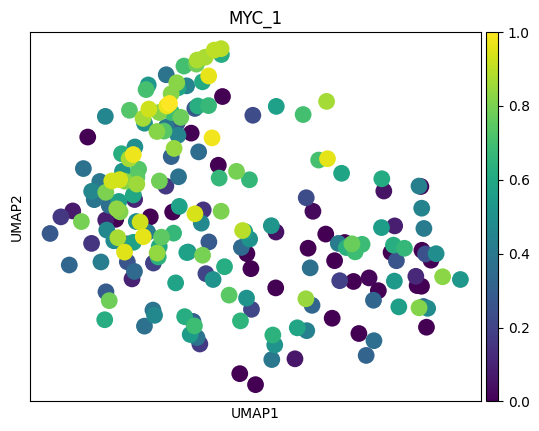

In [71]:
sc.pl.umap(ddata, color='MYC_1', cmap=plt.get_cmap('viridis'))

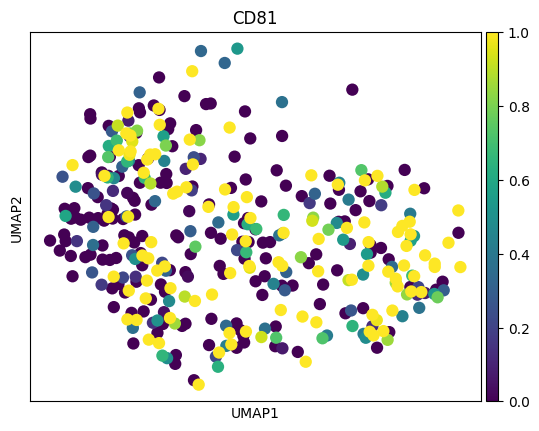

In [65]:
sc.pl.umap(edata, color='CD81', cmap=plt.get_cmap('viridis'))

<Axes: xlabel='CTNNB1', ylabel='Count'>

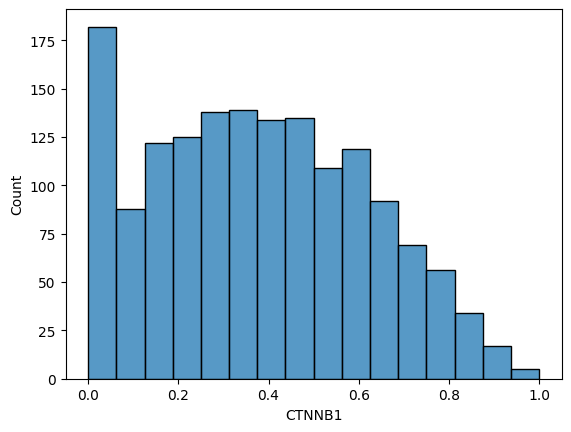

In [66]:
sns.histplot(bdata.obs['CTNNB1'])

<Axes: xlabel='TCF7L2', ylabel='Count'>

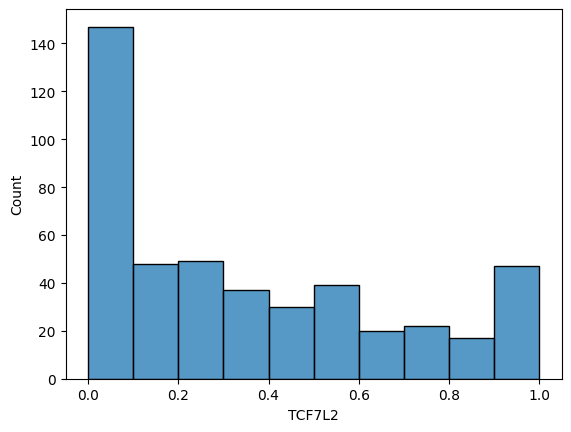

In [75]:
sns.histplot(cdata.obs['TCF7L2'])

<Axes: xlabel='MYC', ylabel='Count'>

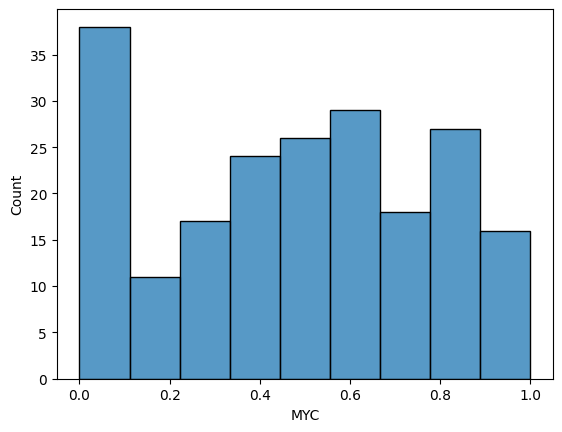

In [67]:
sns.histplot(ddata.obs['MYC'])

<Axes: xlabel='CD81', ylabel='Count'>

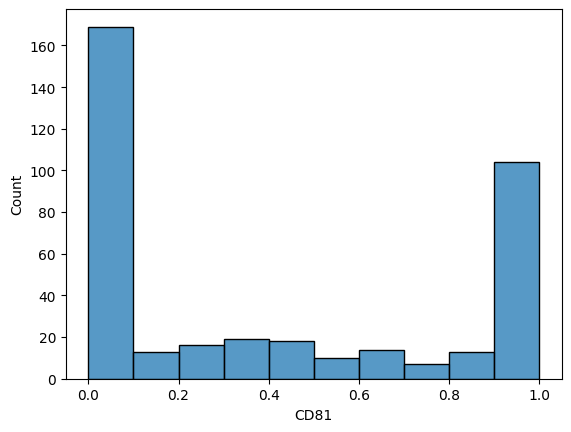

In [73]:
sns.histplot(edata.obs['CD81'])

In [4]:
SCN= sc.read("/gstore/project/crc_recursion_gw/DLD1_Sublib2_Day5/DS000015963/Classifier/raw.qc.pySCN.h5ad")

Only considering the two last: ['.pySCN', '.h5ad'].
Only considering the two last: ['.pySCN', '.h5ad'].


In [5]:
SCN

AnnData object with n_obs × n_vars = 574705 × 39
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    uns: 'DemuxAssignment_hashing_colors', 'SCN_class_colors'

In [6]:
DF = SCN.obs.join(PS).copy()

In [7]:
DF

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts_ribo,pct_counts_ribo,S_score,G2M_score,phase,SCN_class,CD81,CTNNB1,MYC,TCF7L2
SAM24439046_rep1-AAACCCAAGACCACGA,SAM24439046,AAACCCAAGACCACGA,singlet,ENSG00000172538_2,singlet,SAM24439045,DLD1,day5,HTO-7,NGS5446,...,2726,24.389371,-1.153488,0.548774,G2M,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24439046_rep1-AAACCCAAGAGTGGCT,SAM24439046,AAACCCAAGAGTGGCT,singlet,ENSG00000213337_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5446,...,4173,28.880891,-0.860465,-0.474961,G1,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24439046_rep1-AAACCCAAGCACTCAT,SAM24439046,AAACCCAAGCACTCAT,singlet,ENSG00000184445_4,singlet,SAM24439044,DLD1,day5,HTO-13,NGS5446,...,1623,28.201564,-0.600000,-0.573813,G1,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24439046_rep1-AAACCCAAGCTCGGCT,SAM24439046,AAACCCAAGCTCGGCT,singlet,ENSG00000145536_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,2114,26.411794,-0.981395,-0.338289,G1,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24439046_rep1-AAACCCAAGGGCAATC,SAM24439046,AAACCCAAGGGCAATC,singlet,ENSG00000119725_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,3060,23.958660,-1.153488,-1.282212,G1,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24426528_Replicate1-TTTGTTGTCGTCTCAC-1,SAM24426528,TTTGTTGTCGTCTCAC-1,singlet,ENSG00000127616_2,singlet,SAM24426501,DLD1,day5,HTO-2,NGS4907,...,2940,20.809740,-0.413778,0.433304,G2M,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24426528_Replicate1-TTTGTTGTCTAGTACG-1,SAM24426528,TTTGTTGTCTAGTACG-1,singlet,ENSG00000125648_3,singlet,SAM24426501,DLD1,day5,HTO-14,NGS4907,...,2753,19.910320,-0.801119,1.370660,G2M,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24426528_Replicate1-TTTGTTGTCTATGTGG-1,SAM24426528,TTTGTTGTCTATGTGG-1,singlet,ENSG00000157741_2,singlet,SAM24426501,DLD1,day5,HTO-6,NGS4907,...,1967,19.935137,0.150176,0.389034,G2M,Untreatedclus_DLD1,NaN,NaN,NaN,NaN
SAM24426528_Replicate1-TTTGTTGTCTGGCCGA-1,SAM24426528,TTTGTTGTCTGGCCGA-1,singlet,ENSG00000136940_4,singlet,SAM24426501,DLD1,day5,HTO-8,NGS4907,...,2421,21.341678,-0.635366,-0.027344,G1,Untreatedclus_DLD1,NaN,NaN,NaN,NaN


In [8]:
DF[['CD81','CTNNB1', 'MYC', 'TCF7L2']]= DF[['CD81','CTNNB1', 'MYC', 'TCF7L2']].fillna(0)

In [9]:
SCN.obs = DF.copy()

In [10]:
SCN.X

array([[0.00023978, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00178359, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00150111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00087096, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00023815, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00063001, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
AD = SCN[SCN.obs["gene_symbol"]=='CTNNB1'].copy()

In [22]:
AD.obs[AD.obs['CTNNB1']==1]

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts_ribo,pct_counts_ribo,S_score,G2M_score,phase,SCN_class,CD81,CTNNB1,MYC,TCF7L2
SAM24426527_Replicate1-TTCGGTCGTAGTCTGT-1,SAM24426527,TTCGGTCGTAGTCTGT-1,singlet,ENSG00000168036_1,singlet,POSITIVE_CONTROL,DLD1,day5,HTO-16,NGS4907,...,3166,13.691403,-3.696358,-1.73206,G1,DOXclus_DLD1,0.0,1.0,0.0,0.0


In [12]:
AD.X[0,:]

array([1.88594107e-04, 0.00000000e+00, 0.00000000e+00, 9.46260484e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.77676628e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.09772536e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.23903014e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.91256831e-04, 1.95704005e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.86210900e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [19]:
y=AD.obs['CTNNB1'].tolist()

In [17]:
x=AD.X.max(axis=1).tolist()

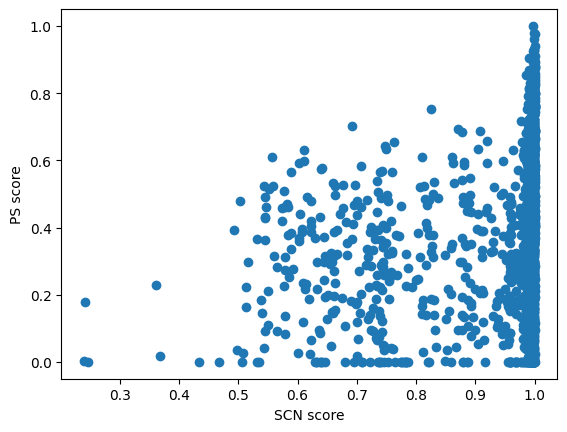

In [20]:
plt.scatter(x, y)
plt.xlabel("SCN score")
plt.ylabel("PS score")
plt.show()

## Generate gRNA count matrix

In [ ]:
gdata = sc.read("/gstore/scratch/u/ghaffars/Dataset/crc_NGS5446/gRNAs_complete.h5ad")

In [ ]:
gdata.obs

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,DemuxType_crispr,DemuxAssignment_crispr
SAM24434749_rep1-AAACCCAAGAGCCCAA,SAM24434749_rep1,AAACCCAAGAGCCCAA,doublet,"ENSG00000168994_2,ENSG00000148225_4,ENSG000001...",doublet,"ENSG00000168994_2,ENSG00000148225_4,ENSG000001..."
SAM24434749_rep1-AAACCCAAGATTAGCA,SAM24434749_rep1,AAACCCAAGATTAGCA,singlet,ENSG00000074771_1,singlet,ENSG00000074771_1
SAM24434749_rep1-AAACCCAAGATTGACA,SAM24434749_rep1,AAACCCAAGATTGACA,singlet,ENSG00000157703_1,singlet,ENSG00000157703_1
SAM24434749_rep1-AAACCCAAGCATCCCG,SAM24434749_rep1,AAACCCAAGCATCCCG,singlet,ENSG00000178233_4,singlet,ENSG00000178233_4
SAM24434749_rep1-AAACCCAAGCATTTCG,SAM24434749_rep1,AAACCCAAGCATTTCG,singlet,ENSG00000178015_2,singlet,ENSG00000178015_2
...,...,...,...,...,...,...
SAM24439046_rep9-TTTGTTGTCGGTAAGG,SAM24439046,TTTGTTGTCGGTAAGG,singlet,ENSG00000184349_1,singlet,ENSG00000184349_1
SAM24439046_rep9-TTTGTTGTCGTCTAAG,SAM24439046,TTTGTTGTCGTCTAAG,doublet,"ENSG00000165623_1,ENSG00000164916_2,ENSG000001...",doublet,"ENSG00000165623_1,ENSG00000164916_2,ENSG000001..."
SAM24439046_rep9-TTTGTTGTCGTGGTAT,SAM24439046,TTTGTTGTCGTGGTAT,singlet,ENSG00000095261_4,singlet,ENSG00000095261_4
SAM24439046_rep9-TTTGTTGTCTCATTTG,SAM24439046,TTTGTTGTCTCATTTG,singlet,ENSG00000146425_3,singlet,ENSG00000146425_3


In [ ]:
bdata.obs

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class
SAM24439046_rep1-AAACCCAAGACCACGA,SAM24439046,AAACCCAAGACCACGA,singlet,ENSG00000172538_2,singlet,SAM24439045,DLD1,day5,HTO-7,NGS5446,...,11177,321,2.871969,2726,24.389371,True,-1.153488,0.548774,G2M,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGAGTGGCT,SAM24439046,AAACCCAAGAGTGGCT,singlet,ENSG00000213337_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5446,...,14449,155,1.072739,4173,28.880891,True,-0.860465,-0.474961,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGCACTCAT,SAM24439046,AAACCCAAGCACTCAT,singlet,ENSG00000184445_4,singlet,SAM24439044,DLD1,day5,HTO-13,NGS5446,...,5755,100,1.737619,1623,28.201564,True,-0.600000,-0.573813,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGCTCGGCT,SAM24439046,AAACCCAAGCTCGGCT,singlet,ENSG00000145536_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,8004,366,4.572714,2114,26.411794,True,-0.981395,-0.338289,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGGGCAATC,SAM24439046,AAACCCAAGGGCAATC,singlet,ENSG00000119725_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,12772,145,1.135296,3060,23.958660,True,-1.153488,-1.282212,G1,Untreatedclus_DLD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24439046_rep9-TTTGTTGTCATGTCAG,SAM24439046,TTTGTTGTCATGTCAG,singlet,ENSG00000138670_2,singlet,SAM24439045,DLD1,day5,HTO-16,NGS5446,...,4601,211,4.585960,1210,26.298631,True,-0.154165,-0.029350,G1,Untreatedclus_DLD1
SAM24439046_rep9-TTTGTTGTCCCATAAG,SAM24439046,TTTGTTGTCCCATAAG,singlet,ENSG00000084628_4,singlet,SAM24439044,DLD1,day5,HTO-14,NGS5446,...,7116,232,3.260259,1977,27.782462,True,-0.580304,0.229036,G2M,Untreatedclus_DLD1
SAM24439046_rep9-TTTGTTGTCGGTAAGG,SAM24439046,TTTGTTGTCGGTAAGG,singlet,ENSG00000184349_1,singlet,SAM24439043,DLD1,day5,HTO-10,NGS5446,...,4423,244,5.516618,1012,22.880398,True,-0.340649,0.196890,G2M,DOXclus_DLD1
SAM24439046_rep9-TTTGTTGTCGTGGTAT,SAM24439046,TTTGTTGTCGTGGTAT,singlet,ENSG00000095261_4,singlet,SAM24439044,DLD1,day5,HTO-15,NGS5446,...,8113,170,2.095402,2115,26.069272,True,-0.769189,-0.373864,G1,Untreatedclus_DLD1


In [ ]:
gdata.obs = gdata.obs.rename(columns={'Barcode':'Bracode2'})

In [ ]:
df = bdata.obs.join(gdata.obs[['Bracode2']])

In [ ]:
df

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class,Bracode2
SAM24439046_rep1-AAACCCAAGACCACGA,SAM24439046,AAACCCAAGACCACGA,singlet,ENSG00000172538_2,singlet,SAM24439045,DLD1,day5,HTO-7,NGS5446,...,321,2.871969,2726,24.389371,True,-1.153488,0.548774,G2M,Untreatedclus_DLD1,AAACCCAAGACCACGA
SAM24439046_rep1-AAACCCAAGAGTGGCT,SAM24439046,AAACCCAAGAGTGGCT,singlet,ENSG00000213337_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5446,...,155,1.072739,4173,28.880891,True,-0.860465,-0.474961,G1,Untreatedclus_DLD1,AAACCCAAGAGTGGCT
SAM24439046_rep1-AAACCCAAGCACTCAT,SAM24439046,AAACCCAAGCACTCAT,singlet,ENSG00000184445_4,singlet,SAM24439044,DLD1,day5,HTO-13,NGS5446,...,100,1.737619,1623,28.201564,True,-0.600000,-0.573813,G1,Untreatedclus_DLD1,AAACCCAAGCACTCAT
SAM24439046_rep1-AAACCCAAGCTCGGCT,SAM24439046,AAACCCAAGCTCGGCT,singlet,ENSG00000145536_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,366,4.572714,2114,26.411794,True,-0.981395,-0.338289,G1,Untreatedclus_DLD1,AAACCCAAGCTCGGCT
SAM24439046_rep1-AAACCCAAGGGCAATC,SAM24439046,AAACCCAAGGGCAATC,singlet,ENSG00000119725_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,145,1.135296,3060,23.958660,True,-1.153488,-1.282212,G1,Untreatedclus_DLD1,AAACCCAAGGGCAATC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24439046_rep9-TTTGTTGTCATGTCAG,SAM24439046,TTTGTTGTCATGTCAG,singlet,ENSG00000138670_2,singlet,SAM24439045,DLD1,day5,HTO-16,NGS5446,...,211,4.585960,1210,26.298631,True,-0.154165,-0.029350,G1,Untreatedclus_DLD1,TTTGTTGTCATGTCAG
SAM24439046_rep9-TTTGTTGTCCCATAAG,SAM24439046,TTTGTTGTCCCATAAG,singlet,ENSG00000084628_4,singlet,SAM24439044,DLD1,day5,HTO-14,NGS5446,...,232,3.260259,1977,27.782462,True,-0.580304,0.229036,G2M,Untreatedclus_DLD1,TTTGTTGTCCCATAAG
SAM24439046_rep9-TTTGTTGTCGGTAAGG,SAM24439046,TTTGTTGTCGGTAAGG,singlet,ENSG00000184349_1,singlet,SAM24439043,DLD1,day5,HTO-10,NGS5446,...,244,5.516618,1012,22.880398,True,-0.340649,0.196890,G2M,DOXclus_DLD1,TTTGTTGTCGGTAAGG
SAM24439046_rep9-TTTGTTGTCGTGGTAT,SAM24439046,TTTGTTGTCGTGGTAT,singlet,ENSG00000095261_4,singlet,SAM24439044,DLD1,day5,HTO-15,NGS5446,...,170,2.095402,2115,26.069272,True,-0.769189,-0.373864,G1,Untreatedclus_DLD1,TTTGTTGTCGTGGTAT


In [ ]:
df = df [['Sample', 'Barcode', 'DemuxType_crispr',
       'DemuxAssignment_crispr', 'DemuxType_hashing',
       'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID',
       'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI',
       'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase',
       'SCN_class']]

In [ ]:
C=df.index.to_list()

In [ ]:
len(C)

213145

In [ ]:
gdata = gdata[gdata.obs.index.isin(C)]

In [ ]:
gdata.obs = df.copy()

In [ ]:
gdata

AnnData object with n_obs × n_vars = 213145 × 21091
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase', 'SCN_class'
    layers: 'counts'

In [ ]:
gdata.obs

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class
SAM24439046_rep1-AAACCCAAGACCACGA,SAM24439046,AAACCCAAGACCACGA,singlet,ENSG00000172538_2,singlet,SAM24439045,DLD1,day5,HTO-7,NGS5446,...,11177,321,2.871969,2726,24.389371,True,-1.153488,0.548774,G2M,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGAGTGGCT,SAM24439046,AAACCCAAGAGTGGCT,singlet,ENSG00000213337_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5446,...,14449,155,1.072739,4173,28.880891,True,-0.860465,-0.474961,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGCACTCAT,SAM24439046,AAACCCAAGCACTCAT,singlet,ENSG00000184445_4,singlet,SAM24439044,DLD1,day5,HTO-13,NGS5446,...,5755,100,1.737619,1623,28.201564,True,-0.600000,-0.573813,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGCTCGGCT,SAM24439046,AAACCCAAGCTCGGCT,singlet,ENSG00000145536_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,8004,366,4.572714,2114,26.411794,True,-0.981395,-0.338289,G1,Untreatedclus_DLD1
SAM24439046_rep1-AAACCCAAGGGCAATC,SAM24439046,AAACCCAAGGGCAATC,singlet,ENSG00000119725_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,12772,145,1.135296,3060,23.958660,True,-1.153488,-1.282212,G1,Untreatedclus_DLD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24439046_rep9-TTTGTTGTCATGTCAG,SAM24439046,TTTGTTGTCATGTCAG,singlet,ENSG00000138670_2,singlet,SAM24439045,DLD1,day5,HTO-16,NGS5446,...,4601,211,4.585960,1210,26.298631,True,-0.154165,-0.029350,G1,Untreatedclus_DLD1
SAM24439046_rep9-TTTGTTGTCCCATAAG,SAM24439046,TTTGTTGTCCCATAAG,singlet,ENSG00000084628_4,singlet,SAM24439044,DLD1,day5,HTO-14,NGS5446,...,7116,232,3.260259,1977,27.782462,True,-0.580304,0.229036,G2M,Untreatedclus_DLD1
SAM24439046_rep9-TTTGTTGTCGGTAAGG,SAM24439046,TTTGTTGTCGGTAAGG,singlet,ENSG00000184349_1,singlet,SAM24439043,DLD1,day5,HTO-10,NGS5446,...,4423,244,5.516618,1012,22.880398,True,-0.340649,0.196890,G2M,DOXclus_DLD1
SAM24439046_rep9-TTTGTTGTCGTGGTAT,SAM24439046,TTTGTTGTCGTGGTAT,singlet,ENSG00000095261_4,singlet,SAM24439044,DLD1,day5,HTO-15,NGS5446,...,8113,170,2.095402,2115,26.069272,True,-0.769189,-0.373864,G1,Untreatedclus_DLD1


## Read sgRNA info

In [ ]:
sgRNA = pd.read_csv("/gstore/home/ghaffars/Cumulus/crc_ngs5445/Cumulus/Split_1/cellranger/crispr_index.csv",header=None) 

In [ ]:
sgRNA.columns= ['sgseq','DemuxAssignment_crispr','crispr']

In [ ]:
sgRNA = sgRNA[['sgseq','DemuxAssignment_crispr']]

In [ ]:
sgRNA

,sgseq,DemuxAssignment_crispr
0,TTCTCCCAGGCCTATGACA,ENSG00000000005_1
1,GGGAGCAAGCACTTCTGGC,ENSG00000000005_2
2,TGATAACGTGACCATGTAT,ENSG00000000005_3
3,AGCAAGCACTTCTGGCCGG,ENSG00000000005_4
4,AAATGGAGGTGTATATGGC,ENSG00000000419_1
...,...,...
21086,CGAACGAACGTCGACTATA,NTC_1000
21087,CGCATAATCGATGCGCGAC,NTC_1001
21088,CGACGGATATAGGTCGACG,NTC_1002
21089,TACGGACCGAATCGTTCCG,NTC_1003


In [ ]:
DF = gdata.obs.reset_index().merge(sgRNA, how='left', on='DemuxAssignment_crispr').set_index('index')

In [ ]:
DF

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class,sgseq
index,,,,,,,,,,,,,,,,,,,,,
SAM24439046_rep1-AAACCCAAGACCACGA,SAM24439046,AAACCCAAGACCACGA,singlet,ENSG00000172538_2,singlet,SAM24439045,DLD1,day5,HTO-7,NGS5446,...,321,2.871969,2726,24.389371,True,-1.153488,0.548774,G2M,Untreatedclus_DLD1,CGGCTTCGAGCCGGTCACC
SAM24439046_rep1-AAACCCAAGAGTGGCT,SAM24439046,AAACCCAAGAGTGGCT,singlet,ENSG00000213337_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5446,...,155,1.072739,4173,28.880891,True,-0.860465,-0.474961,G1,Untreatedclus_DLD1,TAAATGCTTCACTCGGCCC
SAM24439046_rep1-AAACCCAAGCACTCAT,SAM24439046,AAACCCAAGCACTCAT,singlet,ENSG00000184445_4,singlet,SAM24439044,DLD1,day5,HTO-13,NGS5446,...,100,1.737619,1623,28.201564,True,-0.600000,-0.573813,G1,Untreatedclus_DLD1,AAACACGCTATTACTGCCA
SAM24439046_rep1-AAACCCAAGCTCGGCT,SAM24439046,AAACCCAAGCTCGGCT,singlet,ENSG00000145536_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,366,4.572714,2114,26.411794,True,-0.981395,-0.338289,G1,Untreatedclus_DLD1,GGATCTCTTGTACAGTACG
SAM24439046_rep1-AAACCCAAGGGCAATC,SAM24439046,AAACCCAAGGGCAATC,singlet,ENSG00000119725_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5446,...,145,1.135296,3060,23.958660,True,-1.153488,-1.282212,G1,Untreatedclus_DLD1,GCAGTCGGCTAATGTTACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24439046_rep9-TTTGTTGTCATGTCAG,SAM24439046,TTTGTTGTCATGTCAG,singlet,ENSG00000138670_2,singlet,SAM24439045,DLD1,day5,HTO-16,NGS5446,...,211,4.585960,1210,26.298631,True,-0.154165,-0.029350,G1,Untreatedclus_DLD1,CAACTCCTCACGGAATGGA
SAM24439046_rep9-TTTGTTGTCCCATAAG,SAM24439046,TTTGTTGTCCCATAAG,singlet,ENSG00000084628_4,singlet,SAM24439044,DLD1,day5,HTO-14,NGS5446,...,232,3.260259,1977,27.782462,True,-0.580304,0.229036,G2M,Untreatedclus_DLD1,GGTGAGCCGTACCAGGATG
SAM24439046_rep9-TTTGTTGTCGGTAAGG,SAM24439046,TTTGTTGTCGGTAAGG,singlet,ENSG00000184349_1,singlet,SAM24439043,DLD1,day5,HTO-10,NGS5446,...,244,5.516618,1012,22.880398,True,-0.340649,0.196890,G2M,DOXclus_DLD1,GCGGTCCATTTGGAGAGTG


In [ ]:
with open('barcode_rec_NGS5446.txt', 'w') as f:
    print('cell\tbarcode\tsgrna\tgene\tread_count\tumi_count',file=f)
    for i in range(gdata.X.shape[0]):
        
        cell_bc = DF.index[i]
        sg = DF['DemuxAssignment_crispr'].iloc[i]
        sgseq = DF['sgseq'].iloc[i]
        geneid  = DF['gene_symbol'].iloc[i]
        j = gdata.var.index.get_loc(gdata.var.index[gdata.var.index==DF['DemuxAssignment_crispr'].iloc[i]][0])
        umi_count = gdata.X[i,j]
        rcount = umi_count*40
        
        print('\t'.join([cell_bc,sg,sgseq,geneid,str(rcount),str(umi_count)]),file=f)

In [ ]:
BARCODE_REC= pd.read_csv('barcode_rec_NGS5446.txt', delimiter='\t')

In [ ]:
BARCODE_REC['gene'].nunique()

5532

In [ ]:
BARCODE_REC

,cell,barcode,sgrna,gene,read_count,umi_count
0,SAM24439046_rep1-AAACCCAAGACCACGA,ENSG00000172538_2,CGGCTTCGAGCCGGTCACC,FAM170B,1680,42
1,SAM24439046_rep1-AAACCCAAGAGTGGCT,ENSG00000213337_2,TAAATGCTTCACTCGGCCC,ANKRD39,1760,44
2,SAM24439046_rep1-AAACCCAAGCACTCAT,ENSG00000184445_4,AAACACGCTATTACTGCCA,KNTC1,840,21
3,SAM24439046_rep1-AAACCCAAGCTCGGCT,ENSG00000145536_1,GGATCTCTTGTACAGTACG,ADAMTS16,440,11
4,SAM24439046_rep1-AAACCCAAGGGCAATC,ENSG00000119725_1,GCAGTCGGCTAATGTTACC,ZNF410,1080,27
...,...,...,...,...,...,...
213140,SAM24439046_rep9-TTTGTTGTCATGTCAG,ENSG00000138670_2,CAACTCCTCACGGAATGGA,RASGEF1B,960,24
213141,SAM24439046_rep9-TTTGTTGTCCCATAAG,ENSG00000084628_4,GGTGAGCCGTACCAGGATG,NKAIN1,1520,38
213142,SAM24439046_rep9-TTTGTTGTCGGTAAGG,ENSG00000184349_1,GCGGTCCATTTGGAGAGTG,EFNA5,680,17
213143,SAM24439046_rep9-TTTGTTGTCGTGGTAT,ENSG00000095261_4,AGGCTGGAAGCGCCGCTGG,PSMD5,1760,44


In [10]:
LR= pd.read_csv('targetgene_lr_score_pval.txt', delimiter='\t')

In [11]:
LR

,Perturbedgene,AADAT,AAK1,AAMDC,AAMP,AAR2,AASDH,AASDHPPT,ABAT,ABCA2,...,ZSWIM5,ZSWIM7,ZSWIM8,ZSWIM9,ZWILCH,ZWINT,ZXDB,ZXDC,ZYX,ZZEF1
0,AMD1,0.60,0.49,0.22,0.81,0.15,0.29,0.84,0.18,0,...,0.57,0.89,0.75,0.86,0.76,0.10,0,0.93,0.62,0.76
1,AP2M1,0.11,0.45,0.53,0.83,0.82,0.46,0.10,0.09,0,...,0.58,0.08,1.00,0.92,0.20,0.76,0,0.92,0.08,0.51
2,APC,0.86,0.23,0.88,0.82,0.61,0.38,0.28,0.69,0,...,0.26,0.54,0.14,0.65,0.19,0.14,0,0.38,0.84,0.62
3,API5,0.69,0.03,0.90,0.20,0.90,0.78,0.91,0.29,0,...,0.54,0.71,0.77,0.00,0.53,0.08,0,0.91,0.30,0.29
4,C19orf85,0.14,0.56,0.12,0.94,0.37,0.43,0.66,0.33,0,...,0.32,0.78,0.33,0.60,0.80,0.70,0,0.43,0.43,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,YEATS4,0.15,0.38,0.11,0.75,0.36,0.97,0.63,0.86,0,...,0.80,0.20,0.45,0.11,0.57,0.51,0,0.36,0.80,0.40
97,YIPF3,0.83,0.18,0.01,0.02,0.46,0.26,0.31,0.80,0,...,0.05,0.61,0.45,0.40,0.41,0.18,0,0.58,0.04,0.15
98,YY1,0.39,0.04,0.01,0.71,0.27,0.27,0.74,0.28,0,...,0.17,0.76,0.22,0.70,0.28,0.62,0,0.63,0.91,0.04
99,ZBTB11,0.12,0.38,0.15,0.31,0.88,0.34,0.63,0.36,0,...,0.83,0.75,0.84,0.10,0.75,0.61,0,0.09,0.04,0.90


In [13]:
LR

,Perturbedgene,AAMDC,AARSD1,AASS,ABCA7,ABCB8,ABCD3,ABCF3,ABCG2,ABHD17A,...,ZNF845,ZNF865,ZNF878,ZNFX1,ZNHIT1,ZNHIT2,ZNRF1,ZRSR2,ZSCAN30,ZSCAN9
0,ADAMTS16,0.64,0.01,0,0.01,0.80,0.30,0.64,0,0.59,...,0,0,0,0.14,0.28,0.87,0.91,0.03,0,1.00
1,ANKRD39,0.00,0.83,0,0.76,0.20,0.36,0.50,0,0.14,...,0,0,0,0.72,0.37,0.00,0.95,0.40,0,0.78
2,FAM170B,0.79,0.33,0,0.90,0.88,0.56,0.96,0,0.72,...,0,0,0,0.44,0.17,0.66,0.25,0.43,0,0.98
3,GET1,0.58,0.44,0,0.28,0.00,0.01,0.09,0,0.02,...,0,0,0,0.71,0.74,0.01,0.49,0.95,0,0.03
4,IGF2BP3,0.46,0.82,0,0.04,0.86,0.40,0.46,0,0.11,...,0,0,0,0.39,0.22,0.53,0.10,0.36,0,0.87
5,IGHV3-21,0.00,0.84,0,0.33,0.21,0.86,0.78,0,0.05,...,0,0,0,0.01,0.88,0.41,1.00,0.57,0,0.36
6,KCNG1,0.79,0.49,0,0.90,0.77,0.71,0.01,0,0.50,...,0,0,0,0.63,0.17,0.94,0.27,0.51,0,0.03
7,NegCtrl,0.96,0.05,0,0.17,0.96,0.07,0.54,0,1.00,...,0,0,0,0.86,0.72,0.91,0.97,0.39,0,0.90
8,PBX1,0.46,0.30,0,0.45,0.89,0.71,0.33,0,0.17,...,0,0,0,0.06,0.95,0.41,0.37,0.00,0,0.55
9,TBC1D28,0.15,0.17,0,0.28,0.70,0.54,0.02,0,0.75,...,0,0,0,0.25,0.12,0.96,0.03,0.66,0,0.60


In [4]:
LR_old =pd.read_csv('/gstore/scratch/u/ghaffars/scMaGeck/sublib2/targetgene_lr_score_pval.txt', delimiter='\t')

In [5]:
LR_old

,Perturbedgene,AAK1,ABCC3,ABCC5,ABCE1,ABCF1,ABCG2,ABLIM1,AC002480.1,AC004784.1,...,ZFAND3,ZFAS1,ZFPM2,ZNF185,ZNF34,ZNF354B,ZNF511,ZNF563,ZNF593,ZNF706
0,CD81,0.01,0.01,0.88,0.48,0.15,0.48,0.62,0,0.00,...,0.11,0.00,0,0,0,0,0.95,0,0.32,0.47
1,CTNNB1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.87,0,0,0,0,0.00,0,0.00,0.00
2,MYC,0.00,0.22,0.05,0.00,0.00,0.74,0.00,0,0.09,...,0.93,0.00,0,0,0,0,0.00,0,0.00,0.36
3,NegCtrl,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0,0.00,...,1.00,0.90,0,0,0,0,0.00,0,0.00,1.00
4,TCF7L2,0.00,0.00,0.85,0.04,0.00,0.00,0.36,0,0.43,...,0.61,0.14,0,0,0,0,0.00,0,0.02,0.00


In [77]:
LR_old[LR_old["Perturbedgene"]=="CTNNB1"]

,Perturbedgene,AAK1,ABCC3,ABCC5,ABCE1,ABCF1,ABCG2,ABLIM1,AC002480.1,AC004784.1,...,ZFAND3,ZFAS1,ZFPM2,ZNF185,ZNF34,ZNF354B,ZNF511,ZNF563,ZNF593,ZNF706
1,CTNNB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.87,0,0,0,0,0.0,0,0.0,0.0


In [76]:
LR.columns

Index(['Perturbedgene', 'AAMDC', 'AARSD1', 'AASS', 'ABCA7', 'ABCB8', 'ABCD3',
       'ABCF3', 'ABCG2', 'ABHD17A',
       ...
       'ZNF845', 'ZNF865', 'ZNF878', 'ZNFX1', 'ZNHIT1', 'ZNHIT2', 'ZNRF1',
       'ZRSR2', 'ZSCAN30', 'ZSCAN9'],
      dtype='object', length=2067)

In [26]:
LR_CTNNB1 =pd.read_csv('DF_sublib2_CTNNB1.csv')

In [23]:
LR_CD81 =pd.read_csv('DF_sublib2_CD81.csv')

In [34]:
LR_CTNNB1[LR_CTNNB1["Unnamed: 0"]=='ZNF34']

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
14145,ZNF34,0.852435,-0.106809,0.031,0.032,1.0


In [29]:
LR_CTNNB1

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,REG4,0.000000,61.055511,0.622,0.136,0.0
1,TMEM238,0.000000,0.226681,0.800,0.331,0.0
2,TSPAN1,0.000000,42.300466,0.779,0.322,0.0
3,FXYD3,0.000000,1.954089,0.694,0.243,0.0
4,DPP4,0.000000,10.953173,0.515,0.078,0.0
...,...,...,...,...,...,...
14333,REPIN1,0.997038,-0.532892,0.242,0.242,1.0
14334,CRYZ,0.997686,-11.638559,0.343,0.342,1.0
14335,TTI2,0.997714,0.447974,0.152,0.153,1.0
14336,SLC45A2,0.998806,-0.548860,0.023,0.023,1.0


In [37]:
LR_CTNNB1[LR_CTNNB1["p_val_adj"]<0.01]

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,REG4,0.000000e+00,61.055511,0.622,0.136,0.000000
1,TMEM238,0.000000e+00,0.226681,0.800,0.331,0.000000
2,TSPAN1,0.000000e+00,42.300466,0.779,0.322,0.000000
3,FXYD3,0.000000e+00,1.954089,0.694,0.243,0.000000
4,DPP4,0.000000e+00,10.953173,0.515,0.078,0.000000
...,...,...,...,...,...,...
7084,COCH,2.661760e-07,0.772360,0.107,0.072,0.009743
7085,CASKIN2,2.681414e-07,0.722597,0.077,0.048,0.009815
7086,PARP6,2.710164e-07,0.722806,0.107,0.071,0.009920
7087,INTS3,2.722261e-07,0.335016,0.144,0.102,0.009964


In [24]:
LR_CD81[LR_CD81["p_val_adj"]<0.01]

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,CD81,8.630128e-57,-78.102047,0.465,0.814,3.158886e-52
1,JUN,2.809967e-17,-39.312794,0.392,0.214,1.028532e-12
2,GADD45B,1.061798e-15,-9.841699,0.360,0.202,3.886499e-11
3,POLR2L,8.949932e-13,-249.876261,0.997,1.000,3.275944e-08
4,S100A6,1.450594e-11,-385.489595,0.987,0.962,5.309609e-07
5,PVALEF,1.516462e-11,4.273194,0.010,0.001,5.550708e-07
6,PPP1R14B,2.855897e-11,-39.252473,0.927,0.962,1.045344e-06
7,IER2,7.848112e-11,-47.898572,0.851,0.768,2.872645e-06
8,TNFRSF12A,1.648508e-10,-61.128302,0.919,0.855,6.034034e-06
9,GRAMD2A,3.588996e-10,2.600336,0.021,0.003,1.313680e-05


In [25]:
import jax

In [26]:
jax.__version__

'0.4.10'

In [27]:
import jaxlib

In [28]:
jaxlib.__version__

'0.4.10'